In [52]:
#read all the file
import csv
with open('geolytix_uk_retailpoints_v21_202108.csv', 'r') as file:
    reader = csv.reader(file, delimiter = '\t')
    for row in reader:
        print(row)

['id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county']
['1010009413,The Co-operative Group,The Co-operative Food,Co-op Glynneath,High Street,Glynneath,Glyn-Neath,,SA11 5AL,-3.62046566576086,51.7465886905074,288224.002175385,206563.998477506,Rooftop geocoded by Geolytix,,"3,013 < 15,069 ft2 (280 < 1,400 m2)",West Glamorgan']
['1010006064,Tesco,Tesco Express Esso,Tesco Glynneath Esso Express,Neath Road,Glynneath,Glyn-Neath,,SA11 5EW,-3.62936825898931,51.7446621444165,287604.64217385,206363.43847673,Rooftop geocoded by Geolytix,,"< 3,013 ft2 (280m2)",West Glamorgan']
['1010016479,Spar,Spar,Spar - Treherbert,Bute Street,,Treherbert,,CF42 5NR,-3.53331933873135,51.6736677007283,294069.604282313,198324.279162997,Rooftop geocoded by Geolytix,,"< 3,013 ft2 (280m2)",Mid Glamorgan']
['1010016477,Spar,Spar,Spar - Aberdare,66-67 Mill Street,,Aberdare,Trecynon,CF44 8LY,-3.45800279001667,51.722050699829,299384.876922496,20359

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 7562: character maps to <undefined>

In [ ]:
#read only longitude and latitude from the file
import csv
with open('geolytix_uk_retailpoints_v21_202108.csv', newline='') as csvfile:
 data = csv.DictReader(csvfile)
 print("long_wgs, lat_wgs")
 print("---------------------------------")
 for row in data:
   print(row['long_wgs'], row['lat_wgs'])

In [13]:
##max and min from long and max and min from lat:
import pandas as pd
df=pd.read_csv('geolytix_uk_retailpoints_v21_202108.csv')
#FINDING MAX AND MIN
longp=df['long_wgs'].max()
longq=df['long_wgs'].min()
print(longp)
print(longq)
print("****************")
#now for latitude:
latp=df['lat_wgs'].max()
latq=df['lat_wgs'].min()
print(latp)
print(latq)

1.75259943776466
-7.87206545579663
****************
60.396446426791
49.1692967287003


In [14]:
#dividing space in 4 quadrants:
lengthx = abs((longp - longq) / 2 + longq)
lengthy = abs((latp - latq) / 2 + latq)
print(lengthx)
print(lengthy)

3.059733009015985
54.78287157774565


In [ ]:
#four quadrants:
q1 = [(longp, latp), (lengthx, latp), (lengthx, lengthy), (longq, lengthy)]
print(q1)
q2 = [(lengthx, latp), (longp, latp), (longp, lengthy), (lengthx, lengthy)]
print(q2)
q3 = [(lengthx, lengthy), (longp, lengthy), (longp, latq), (lengthx, latq)]
print(q3)
q4 = [(longq, lengthy), (lengthx, lengthy), (lengthx, latq), (longq, latq)]
print(q4)

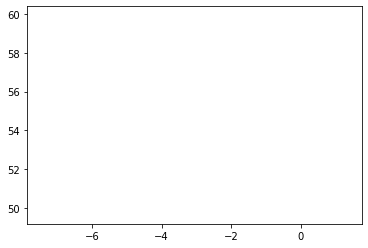

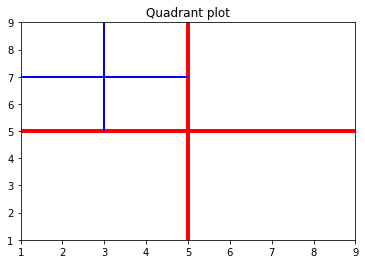

In [28]:
#inserting points in q:
import matplotlib.pyplot as plt

plt.figure()
# Set x-axis range
plt.xlim((longq,longp))
# Set y-axis range
plt.ylim((latq,latp))
plt.show()


#idea of what to do in exercise:
plt.figure()
# Set x-axis range
plt.xlim((1,9))
# Set y-axis range
plt.ylim((1,9))
# Draw lines to split quadrants
plt.plot([5,5],[1,9], linewidth=4, color='red' )
plt.plot([1,9],[5,5], linewidth=4, color='red' )
plt.title('Quadrant plot')
# Draw some sub-regions in upper left quadrant
plt.plot([3,3],[5,9], linewidth=2, color='blue')
plt.plot([1,5],[7,7], linewidth=2, color='blue')
plt.show()

In [ ]:
#Selection of points for q1:
col_list = ["long_wgs"]
df = pd.read_csv("geolytix_uk_retailpoints_v21_202108.csv", usecols=col_list)
print(df["long_wgs"])

listq1x=[]
for i in (df["long_wgs"]):
    if(i < lengthx) :
        listq1x.append(i)
print(listq1x)

In [ ]:
#Selection of points q1 for latitude:
col_list = ["lat_wgs"]
df = pd.read_csv("geolytix_uk_retailpoints_v21_202108.csv", usecols=col_list)
print(df["lat_wgs"])
listq1y=[]
for i in (df["lat_wgs"]):
    if(i < lengthy) :
        listq1y.append(i)
print(listq1y)

In [ ]:
#Final selection of points in quadrants and division of Qs:
def quadrants(long_wgs, lat_wgs):
    if(long_wgs<lengthx and lat_wgs>lengthy):
        print("q1")
    elif(long_wgs<lengthx and lat_wgs<lengthy):
        print("q2")
    elif(long_wgs>lengthx and lat_wgs<lengthy):
        print("q3")
    elif(long_wgs<lengthx and lat_wgs<lengthy):
        print("q4")
    else:
        print("Origin")
quadrants(10, 2)

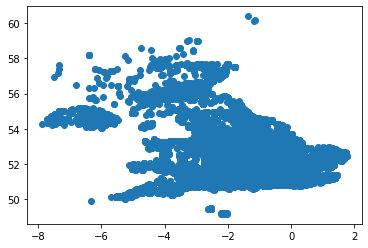

In [29]:
#drawing ALL the points from file
import matplotlib.pyplot as plt
plt.scatter(x=df['long_wgs'], y=df['lat_wgs'])
plt.show()

In [ ]:
#plotting point in quadrants:
import matplotlib.pyplot as plt
def q(long_wgs, lat_wgs):
    if(long_wgs<lengthx and lat_wgs>lengthy):
        print("q1")
        plt.scatter(x=df['long_wgs'], y=df['lat_wgs'])
        plt.scatter(long_wgs, lat_wgs)
        
q(-6,58)

q1


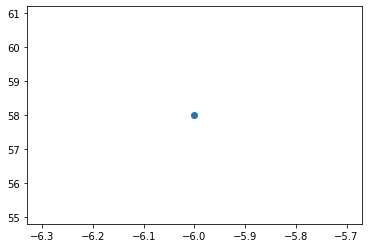

In [21]:
#ploting only the point without quadrants:
import matplotlib.pyplot as plt
def q(long_wgs, lat_wgs):
    if(long_wgs<lengthx and lat_wgs>lengthy):
        print("q1")
        #plt.scatter(x=df['long_wgs'], y=df['lat_wgs'])
        plt.scatter(long_wgs, lat_wgs)
        
q(-6,58)

In [37]:
#Generate 4 quadrants per each Quadrant. Total 16 quadrants:
qn_1 = [(longp/2, latp/2), (lengthx/2, latp/2), (lengthx/2, lengthy/2), (longq/2, lengthy/2)]
print(qn_1)
qn_2 = [(lengthx/2, latp/2), (longp/2, latp/2), (longp/2, lengthy/2), (lengthx/2, lengthy/2)]
print(qn_2)
qn_3 = [(lengthx/2, lengthy/2), (longp/2, lengthy/2), (longp/2, latq/2), (lengthx/2, latq/2)]
print(qn_3)
qn_4 = [(longq/2, lengthy/2), (lengthx/2, lengthy/2), (lengthx/2, latq/2), (longq/2, latq/2)]
print(qn_4)



[(0.87629971888233, 30.1982232133955), (1.5298665045079924, 30.1982232133955), (1.5298665045079924, 27.391435788872826), (-3.936032727898315, 27.391435788872826)]
[(1.5298665045079924, 30.1982232133955), (0.87629971888233, 30.1982232133955), (0.87629971888233, 27.391435788872826), (1.5298665045079924, 27.391435788872826)]
[(1.5298665045079924, 27.391435788872826), (0.87629971888233, 27.391435788872826), (0.87629971888233, 24.58464836435015), (1.5298665045079924, 24.58464836435015)]
[(-3.936032727898315, 27.391435788872826), (1.5298665045079924, 27.391435788872826), (1.5298665045079924, 24.58464836435015), (-3.936032727898315, 24.58464836435015)]


In [47]:
#Adapted from https://www.programiz.com/dsa/binary-search-tree
# Binary Search Tree operations in Python


# Create a node
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None


# Inorder traversal
def inorder(root):
    if root is not None:
        # Traverse left
        inorder(root.left)

        # Traverse root
        print(str(root.key) + "->", end=' ')

        # Traverse right
        inorder(root.right)


# Insert a node
def insert(node, key):

    # Return a new node if the tree is empty
    if node is None:
        return node

    # Traverse to the right place and insert the node
    if key < node.key:
        node.left = insert(node.left, key)
    else:
        node.right = insert(node.right, key)

    return node



In [48]:
class Node:
     
    def __init__(self, key):
         
        self.key = key
        self.child = []
   
 # Utility function to create a new tree node
def newNode(key):   
    temp = Node(key)
    return temp
     
# Prints the n-ary tree level wise
def LevelOrderTraversal(root):
 
    if (root == None):
        return;
   
    # Standard level order traversal code
    # using queue
    q = []  # Create a queue
    q.append(root); # Enqueue root
    while (len(q) != 0):
     
        n = len(q);
  
        # If this node has children
        while (n > 0):
         
            # Dequeue an item from queue and print it
            p = q[0]
            q.pop(0);
            print(p.key, end=' ')
   
            # Enqueue all children of the dequeued item
            for i in range(len(p.child)):
                q.append(p.child[i]);
            n -= 1
        print() # Print new line between two levels
      
# Driver program
if __name__=='__main__':

    root = newNode(['globalMaxX','globalMinX','globalMaxY','globalMinY']);
    (root.child).append(newNode(['Q1MaxX','Q1MinX','Q1MaxY','Q1MinY']));
    (root.child).append(newNode(['Q2MaxX','Q2MinX','Q2MaxY','Q2MinY']));
    (root.child).append(newNode(['Q3MaxX','Q3MinX','Q3MaxY','Q3MinY']));
    (root.child).append(newNode(['Q4MaxX','Q4MinX','Q4MaxY','Q4MinY']));
    (root.child[0].child).append(newNode(['lat1_1','lon1_1','retailer1_1','pc1_1']));
    (root.child[0].child).append(newNode(['lat2_1','lon2_1','retailer2_1','pc2_1']));
    (root.child[0].child).append(newNode(['lat3_1','lon3_1','retailer3_1','pc3_1']));
    (root.child[0].child).append(newNode(['lat4_1','lon4_1','retailer4_1','pc4_1']));
    (root.child[1].child).append(newNode(['lat1_2','lon1_2','retailer1_2','pc1_2']));
    (root.child[1].child).append(newNode(['lat2_2','lon2_2','retailer2_2','pc2_2']));
    (root.child[1].child).append(newNode(['lat3_2','lon3_2','retailer3_2','pc3_2']));
    (root.child[1].child).append(newNode(['lat4_2','lon4_2','retailer4_2','pc4_2']));
    (root.child[2].child).append(newNode(['lat1_3','lon1_3','retailer1_3','pc1_3']));
    (root.child[2].child).append(newNode(['lat2_3','lon2_3','retailer2_3','pc2_3']));
    (root.child[2].child).append(newNode(['lat3_3','lon3_3','retailer3_3','pc3_3']));
    (root.child[2].child).append(newNode(['lat4_3','lon4_3','retailer4_3','pc4_3']));
    (root.child[3].child).append(newNode(['lat1_4','lon1_4','retailer1_4','pc1_4']));
    (root.child[3].child).append(newNode(['lat2_4','lon2_4','retailer2_4','pc2_4']));
    (root.child[3].child).append(newNode(['lat3_4','lon3_4','retailer4_4','pc3_4']));
    (root.child[3].child).append(newNode(['lat4_4','lon4_4','retailer4_4','pc4_4']));

    print("Traversal")
    LevelOrderTraversal(root);


Traversal
['globalMaxX', 'globalMinX', 'globalMaxY', 'globalMinY'] 
['Q1MaxX', 'Q1MinX', 'Q1MaxY', 'Q1MinY'] ['Q2MaxX', 'Q2MinX', 'Q2MaxY', 'Q2MinY'] ['Q3MaxX', 'Q3MinX', 'Q3MaxY', 'Q3MinY'] ['Q4MaxX', 'Q4MinX', 'Q4MaxY', 'Q4MinY'] 
['lat1_1', 'lon1_1', 'retailer1_1', 'pc1_1'] ['lat2_1', 'lon2_1', 'retailer2_1', 'pc2_1'] ['lat3_1', 'lon3_1', 'retailer3_1', 'pc3_1'] ['lat4_1', 'lon4_1', 'retailer4_1', 'pc4_1'] ['lat1_2', 'lon1_2', 'retailer1_2', 'pc1_2'] ['lat2_2', 'lon2_2', 'retailer2_2', 'pc2_2'] ['lat3_2', 'lon3_2', 'retailer3_2', 'pc3_2'] ['lat4_2', 'lon4_2', 'retailer4_2', 'pc4_2'] ['lat1_3', 'lon1_3', 'retailer1_3', 'pc1_3'] ['lat2_3', 'lon2_3', 'retailer2_3', 'pc2_3'] ['lat3_3', 'lon3_3', 'retailer3_3', 'pc3_3'] ['lat4_3', 'lon4_3', 'retailer4_3', 'pc4_3'] ['lat1_4', 'lon1_4', 'retailer1_4', 'pc1_4'] ['lat2_4', 'lon2_4', 'retailer2_4', 'pc2_4'] ['lat3_4', 'lon3_4', 'retailer4_4', 'pc3_4'] ['lat4_4', 'lon4_4', 'retailer4_4', 'pc4_4'] 


In [57]:
#user input, to locate store from file:
long_wgs = float(input("Enter first number:"))
lat_wgs = float(input("Enter second number:"))

#make a search from hash table with these 2 values:
file = pd.read_csv("geolytix_uk_retailpoints_v21_202108.csv")
import pandas as pd
def hashF(key):
    P = 1024
    hashVal = 0
    for i in key:
        hashVal = int((2048 * hashVal + ord(i)) % P) #hash function
    return hashVal


##retailer + postcode input = specific information
#hashTableRetailer = dict(zip(hashed_key, value_in_ht))
#print(hashTableRetailer)

searchValueHashed = hashF(searchValue)
print(row.retailer, ", ", row.postcode, " ===>>> ", row.store_name, ", ", 
          row.town, row.postcode, ", ",row.size_band, ", ", row.add_one)
#printing all desired information for specific key1 and key2
print(hashTableRetailer.get(searchValueHashed))

Enter first number:5
Enter second number:6
Channel Islands Co-operative Society ,  GY1 2BA  ===>>>  Co-op Locale Longstore ,  Guernsey GY1 2BA ,  < 3,013 ft2 (280m2) ,  Bouet
None


In [ ]:
#END of Coursework 3.